# Is It a Cat? - Cat Image Classifier
The goal of this project will be to train a neural network to classify images into two categories: cat or not cat.

#### Note:
I have already merged the datasets used manually beforehand for ease of use. It saved much more time than trying to do it within tensorflow as there were multiple classes of animals to sort through.

In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('razinahsab/isitacat', unzip=True)

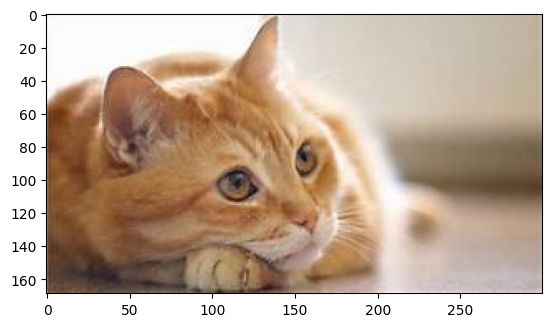

In [2]:
plt.imshow(image.load_img('IsItACatData/cat/2.jpeg'))

In [3]:
cv.imread('IsItACatData/cat/2.jpeg').shape

(169, 300, 3)

In [4]:
def load_images(directory, label):
    data=[]
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (64, 64))
        img = img / 255.0
        data.append([img, label])
    return data

cat_data = load_images('IsItACatData/cat', 1)
non_cat_data = load_images('IsItACatData/not cat', 0)

In [5]:
import random

data = cat_data + non_cat_data
random.shuffle(data)

x = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])

In [6]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size = 3,
                        activation = 'relu', padding = 'same',
                        kernel_initializer = 'he_normal')

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape = (64, 64, 3)),
    DefaultConv2D(32),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(64),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(128),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,081 (4.36 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_text = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
%autosave 0

Autosave disabled


In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_text))

Epoch 1/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.8934 - loss: 0.2854 - val_accuracy: 0.9565 - val_loss: 0.1246
Epoch 2/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.9570 - loss: 0.1230 - val_accuracy: 0.9622 - val_loss: 0.1082
Epoch 3/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.9681 - loss: 0.0914 - val_accuracy: 0.9598 - val_loss: 0.1123
Epoch 4/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.9744 - loss: 0.0736 - val_accuracy: 0.9664 - val_loss: 0.1022
Epoch 5/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.9810 - loss: 0.0549 - val_accuracy: 0.9591 - val_loss: 0.1193
Epoch 6/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.9841 - loss: 0.0414 - val_accuracy: 0.9684 - val_loss: 0.1039
Epoch 7/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.9887 - loss: 0.0304 - val_accuracy: 0.9702 - val_loss: 0.1195
Epoch 8/10
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.9914 -

In [15]:
model.save('cat_classifier.keras')